#Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

#Perceptron class

In [6]:
class Perceptron:

    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, ephocs):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(ephocs):
            # counter of the errors during this training iteration
            errors = 0
            for xi, yi in zip(x, y):
                # for each sample compute the update value
                update = self.learning_rate * (yi - self.predict(xi))
                # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        return np.where(self.f(x) >= 0, 1, -1)

#Reading data and visualize it

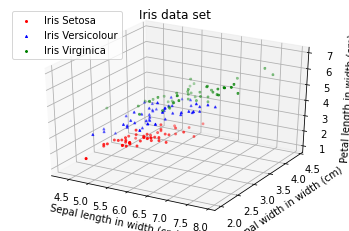

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

#features
x = df.iloc[:, 0:3].values
#labels
y = df.iloc[:, 4].values

# plot the samples
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")
ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red',
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',
           marker='x', s=4, edgecolor='green', label="Iris Virginica")
plt.legend(loc='upper left')
plt.show()

#Take the first two classes "Setose, Versicolour" and two features to work on them 

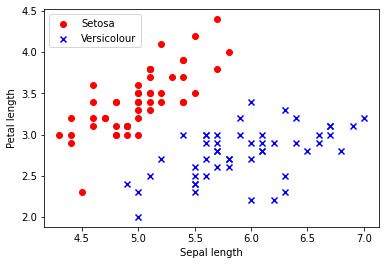

In [4]:
x = x[0:100, 0:2] 
y = y[0:100]

# plot Iris Setosa and Iris Versicolour samples
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x',  label='Versicolour')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')
plt.show()

#Standardize the features 

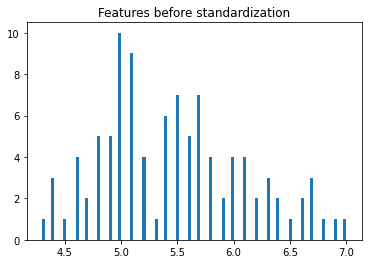

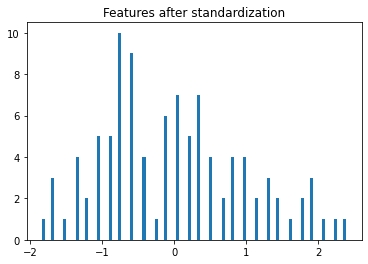

In [5]:
# map the labels to a binary integer value
y = np.where(y == 'Iris-setosa', 1, -1)

# standardization of the input features
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.show()

x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()

#Train perceptron on 80% of the data

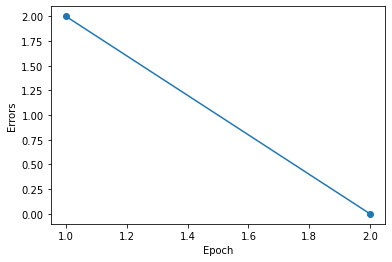

In [7]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# train the model
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train, ephocs = 2)

# plot the number of errors during each ephocs to choose the best number of ephocs
plt.plot(range(1, len(classifier.misclassified_samples) + 1), classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

#Plot to show the testing samples classified using a drawn line

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


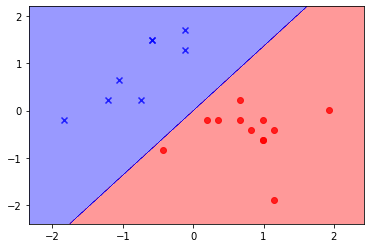

In [8]:
def plot_decision_regions(x, y):
    resolution = 0.001
    
    # define a set of markers
    markers = ('o', 'x')
    # define available colors
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
    plt.show()

plot_decision_regions(x_test, y_test)

#Confusion matrix for the testing data and accuracy

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(classifier.predict(x_test), y_test))
print("accuracy %f" % accuracy_score(classifier.predict(x_test), y_test))

[[12  0]
 [ 0  8]]
accuracy 1.000000
